https://github.com/aashutosh-raut/Carprediction

In [1]:
import numpy as np #importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.3.2', '2.3.1', '0.13.2', '3.10.5')

In [3]:
df = pd.read_csv('Cars.csv') #importing/loading the data set

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape # Checking the number of data and columns

(8128, 13)

In [6]:
df.describe() # here we describe the data, see what the rows and columns have

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [8]:
df.columns # here we see what are the columns (features we will later take to train test the model. some of them we will use some we will drop.) now we will rename the columns below. 

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [9]:
df.rename(columns = {'name': 'brand', 'year': 'year', 'selling_price': 'selling_price', 'km_driven': 'km_driven', 'fuel': 'fuel', 'seller_type': 'seller_type', 'transmission': 'transmission', 'owner': 'owner', 'mileage': 'milage',  'engine': 'engine', 'max_power': 'max_power', 'torque': 'torque', 'seats': 'seats'}, inplace = True)
# The above is the renaming process of the Exploratory (EDA)

In [10]:
df.columns # checking the updated columns names

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'milage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [11]:
df['owner'].unique() # checking the data in the owner column

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [12]:
df['owner'] = df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}) # changing the string into numeric values

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\3554053464.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'] = df['owner'].replace({


In [13]:
df['owner'].unique() # checking the updated data 

array([1, 2, 3, 4, 5])

In [14]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,milage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
df['fuel'].unique() # checking the data in the fuel column 

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [16]:
df = df[df['fuel'] != 'LPG']
df['fuel'] #droping LPG from the data

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8090, dtype: object

In [17]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [18]:
df = df[df['fuel'] != 'CNG']
df['fuel'] #dropping CNG from the data

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8033, dtype: object

In [19]:
df['fuel'].unique() # checking if LPG and CNG have been dropped from the data

array(['Diesel', 'Petrol'], dtype=object)

In [20]:
df['milage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '24.52 kmpl',
       '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl',
       '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl', '18.2 kmpl',
       '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl', '23.95 kmpl',
       '17.0 kmpl', '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl',
       '18.5 kmpl', '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl',
       '26.0 kmpl', '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '16.47 kmpl', '15.04 kmpl',
      

In [21]:
df['milage'] = df['milage'].str.split(' ').str[0]
df['milage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: milage, Length: 8033, dtype: object

In [22]:
df['milage'].dtype

dtype('O')

In [23]:
df['milage'] = df['milage'].astype(float)
df['milage'].dtype

dtype('float64')

In [24]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1061 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [25]:
df['engine'] = df['engine'].str.split(' ').str[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [26]:
df['engine'] = df['engine'].astype(float)
df['engine'].dtype

dtype('float64')

In [27]:
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [28]:
df['max_power'] = df['max_power'].str.split(' ').str[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [29]:
df['max_power'] = df['max_power'].astype(float)
df['max_power'].dtype

dtype('float64')

In [30]:
df['brand']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: brand, Length: 8033, dtype: object

In [31]:
df['brand'] = df['brand'].str.split(' ').str[0]
df['brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8033, dtype: object

In [32]:
df.drop(columns={'torque'}, inplace=True) #Dropping torque 

In [33]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,milage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [34]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [35]:
df['owner'].dtype

dtype('int64')

In [36]:
df = df[df['owner'] !=5] # Removing test drive cars
df['owner'].unique()

array([1, 2, 3, 4])

In [37]:
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8028, dtype: int64

In [38]:
y = np.log(df['selling_price']) #Transforming y ie selling price using log

y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [39]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,milage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


<Axes: xlabel='owner', ylabel='count'>

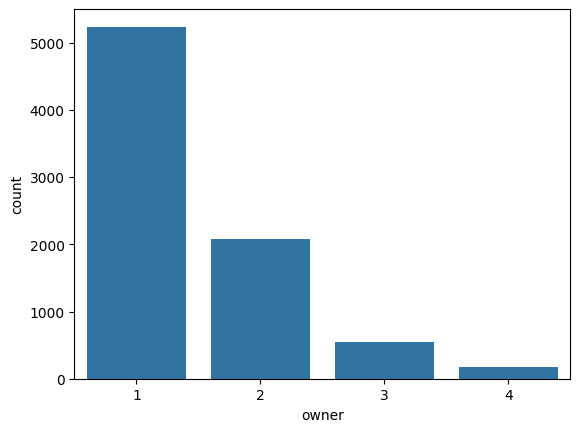

In [40]:
sns.countplot(data = df, x = 'owner') # Univariate analysis. Countplot.

<Axes: xlabel='fuel', ylabel='count'>

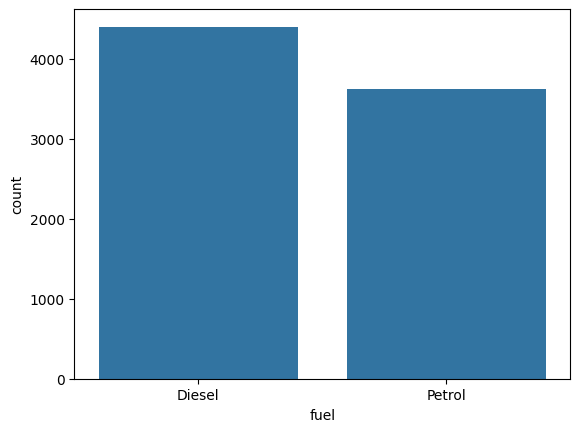

In [41]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

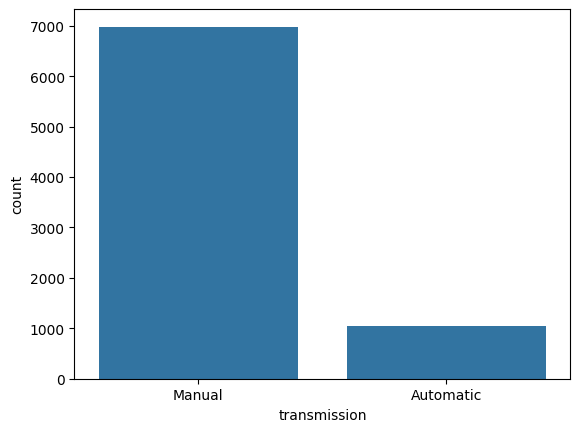

In [42]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

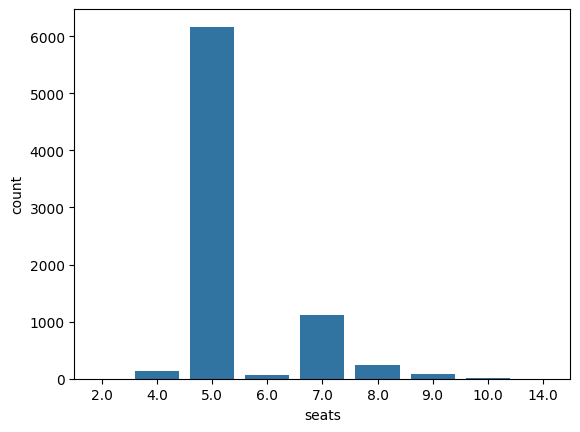

In [43]:
sns.countplot(data = df, x = 'seats')

Text(0.5, 0, 'engine')

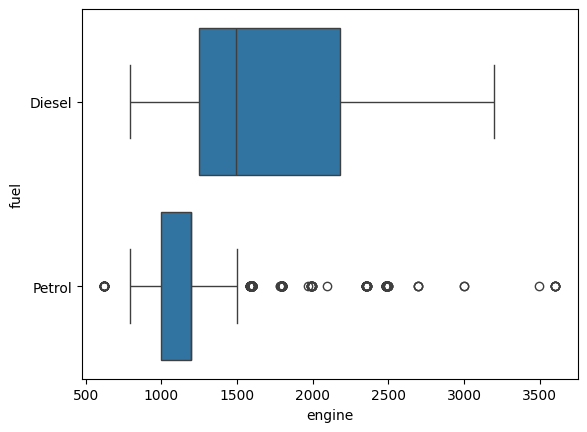

In [44]:
sns.boxplot(x = df["engine"], y = df["fuel"]); #Boxplot
plt.ylabel("fuel")
plt.xlabel("engine")

<Axes: xlabel='milage', ylabel='engine'>

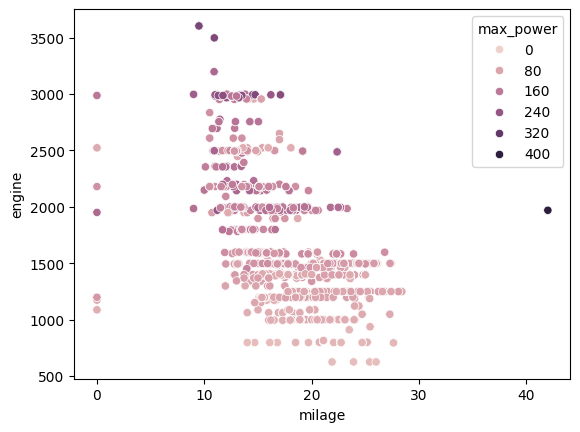

In [45]:

sns.scatterplot(x = df['milage'], y = df['engine'], hue=df['max_power']) #scatterplot

<Axes: xlabel='milage', ylabel='year'>

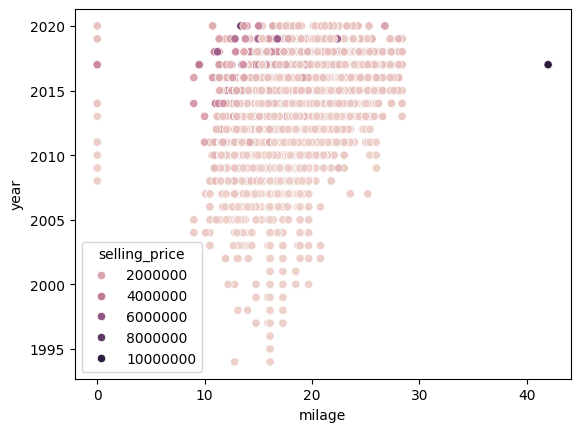

In [46]:

sns.scatterplot(x = df['milage'], y = df['year'], hue=df['selling_price'])

In [47]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,milage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [48]:
print(df['fuel'].unique())
print(df['brand'].unique())
print(df['transmission'].unique())



['Diesel' 'Petrol']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
['Manual' 'Automatic']


In [49]:
df.dtypes #checking datatypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
milage           float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()
 # 0 = diesel and 1 = petrol 
 # transforming object 

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\4082662538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fuel"] = le.fit_transform(df["fuel"])


array([0, 1])

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

df["seller_type"].unique() #using fit transform to change object into 1, 0, 2 ie the individual, dealer and trademark dealer

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\1894372868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seller_type"] = le.fit_transform(df["seller_type"])


array([1, 0, 2])

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique() 

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\3588422592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transmission"] = le.fit_transform(df["transmission"])


array([1, 0])

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique() #assigning brand names of cars with numeric values

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\3341274267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["brand"] = le.fit_transform(df["brand"])


array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

<Axes: >

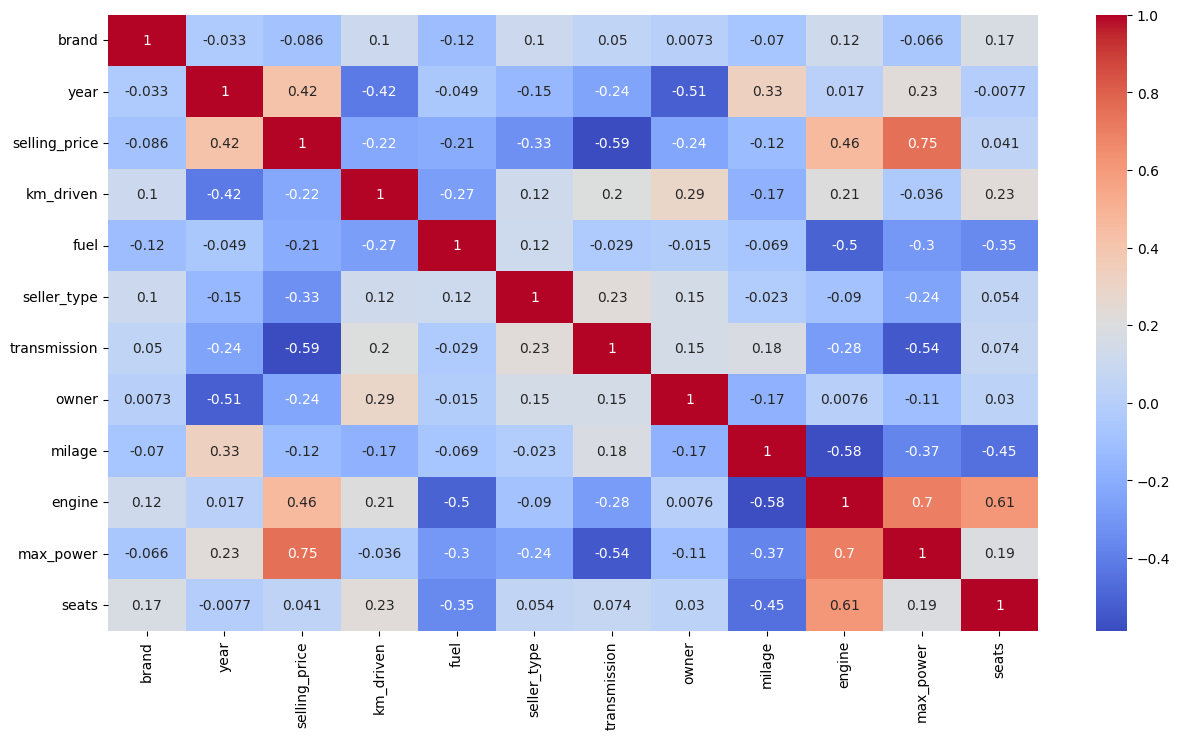

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # plotting the corelation matrix 

In [55]:
df = df.drop(columns=['year', 'transmission', 'owner'])
df # dropping the columns year, transmission and owners

,brand,selling_price,km_driven,fuel,seller_type,milage,engine,max_power,seats
0,20,450000,145500,0,1,23.40,1248.0,74.00,5.0
1,27,370000,120000,0,1,21.14,1498.0,103.52,5.0
2,10,158000,140000,1,1,17.70,1497.0,78.00,5.0
3,11,225000,127000,0,1,23.00,1396.0,90.00,5.0
4,20,130000,120000,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...
8123,11,320000,110000,1,1,18.50,1197.0,82.85,5.0
8124,11,135000,119000,0,1,16.80,1493.0,110.00,5.0
8125,20,382000,120000,0,1,19.30,1248.0,73.90,5.0
8126,28,290000,25000,0,1,23.57,1396.0,70.00,5.0


<Axes: >

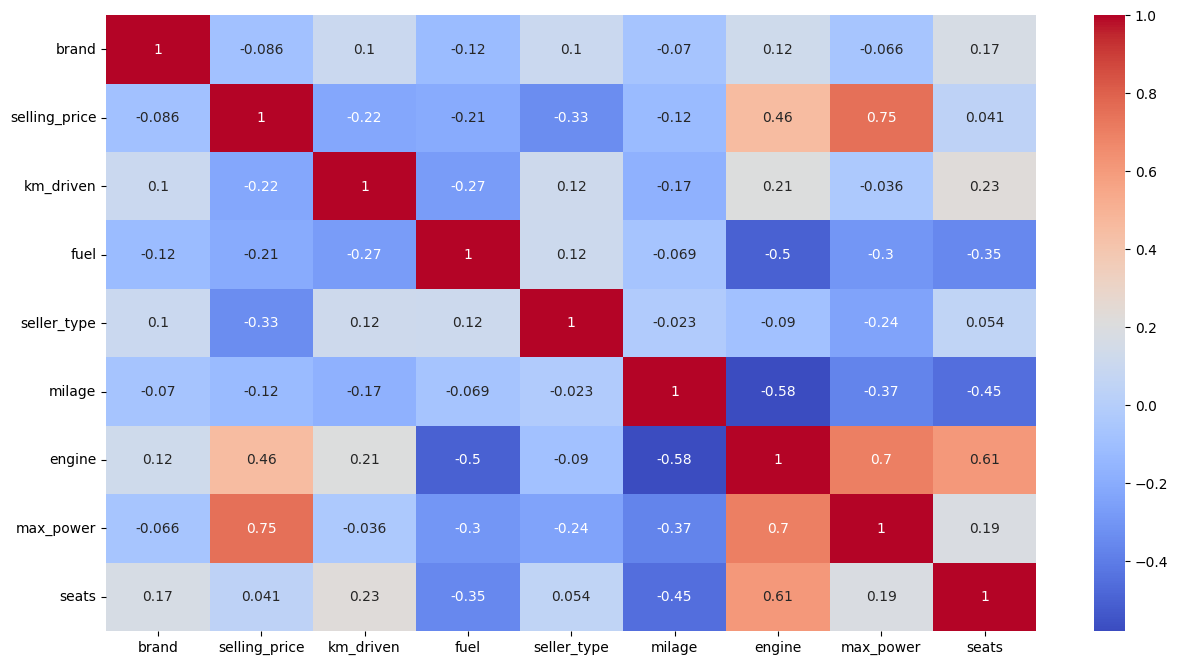

In [56]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # corelation matrix of the features we will take for the model (x and y )

In [57]:
X = df[['brand', 'km_driven', 'fuel', 'seller_type', 'milage', 'engine', 'max_power', 'seats']]
Y = df['selling_price'] #feature engineering the data x are the features we use to get the y where y is the selling price of cars

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) # Splitting the data into train set and test set

In [59]:
x_train[['brand', 'km_driven', 'fuel', 'seller_type', 'milage', 'engine', 'max_power', 'seats']].isna().sum() # finding the null values in x

brand            0
km_driven        0
fuel             0
seller_type      0
milage         154
engine         154
max_power      149
seats          154
dtype: int64

In [60]:
y_train.isna().sum() #finding the null values in y

np.int64(0)

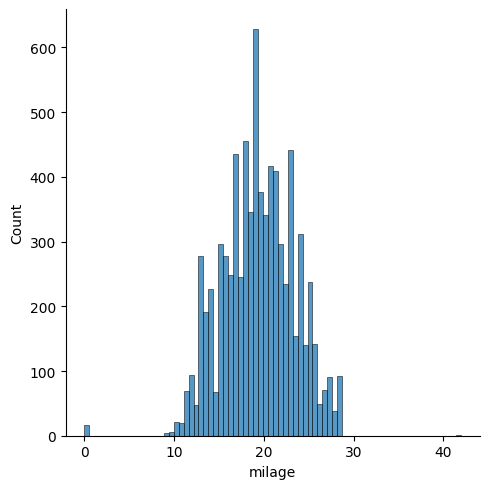

In [61]:
sns.displot(data=df, x='milage') # plotting the data

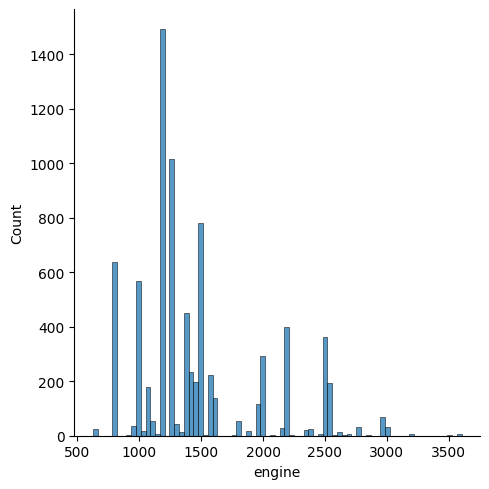

In [62]:
sns.displot(data=df, x='engine')

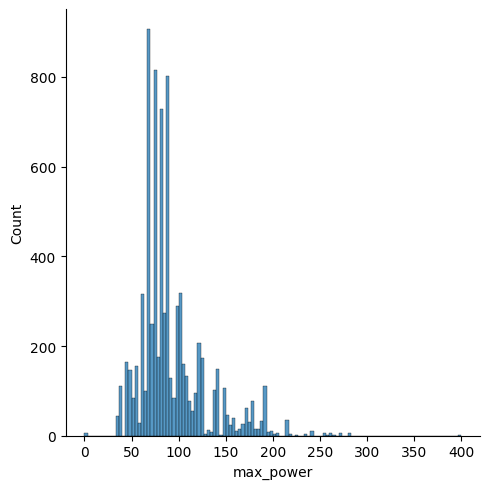

In [63]:
sns.displot(data=df, x='max_power')

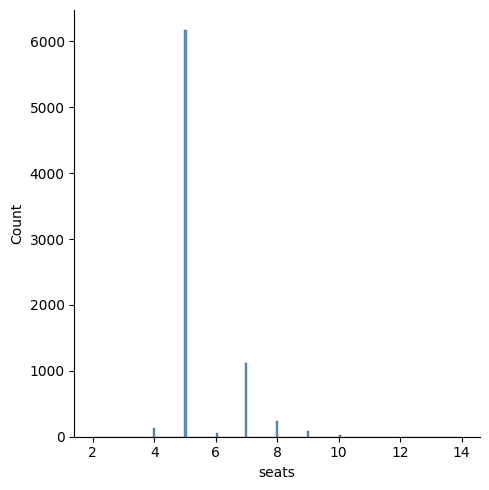

In [64]:
sns.displot(data=df, x='seats')

In [65]:
x_train['milage'].fillna(x_train['milage'].median(), inplace=True)
x_train['engine'].fillna(x_train['engine'].median(), inplace=True)
x_train['seats'].fillna(x_train['seats'].median(), inplace=True)
x_train['max_power'].fillna(x_train['max_power'].median(), inplace=True) # filling the null data in the x of the trainset with the median

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\541319386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['milage'].fillna(x_train['milage'].median(), inplace=True)
C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\541319386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [66]:
x_train['seats'].isna().sum()

np.int64(0)

In [67]:
x_train[['brand', 'km_driven', 'fuel', 'seller_type', 'milage', 'engine', 'max_power', 'seats']].isna().sum() # checking if the x train dataset has any null values. it does not. the values have been imputed.

brand          0
km_driven      0
fuel           0
seller_type    0
milage         0
engine         0
max_power      0
seats          0
dtype: int64

In [68]:
x_test['milage'].fillna(x_test['milage'].median(), inplace=True)
x_test['engine'].fillna(x_test['engine'].median(), inplace=True)
x_test['seats'].fillna(x_test['seats'].median(), inplace=True)
x_test['max_power'].fillna(x_test['max_power'].median(), inplace=True) 

# filling data in test set

C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\1443584221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['milage'].fillna(x_test['milage'].median(), inplace=True)
C:\Users\aashu\AppData\Local\Temp\ipykernel_18212\1443584221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [69]:
x_test[['brand', 'km_driven', 'fuel', 'seller_type', 'milage', 'engine', 'max_power', 'seats']].isna().sum() # checking if the test set has null values.

brand          0
km_driven      0
fuel           0
seller_type    0
milage         0
engine         0
max_power      0
seats          0
dtype: int64

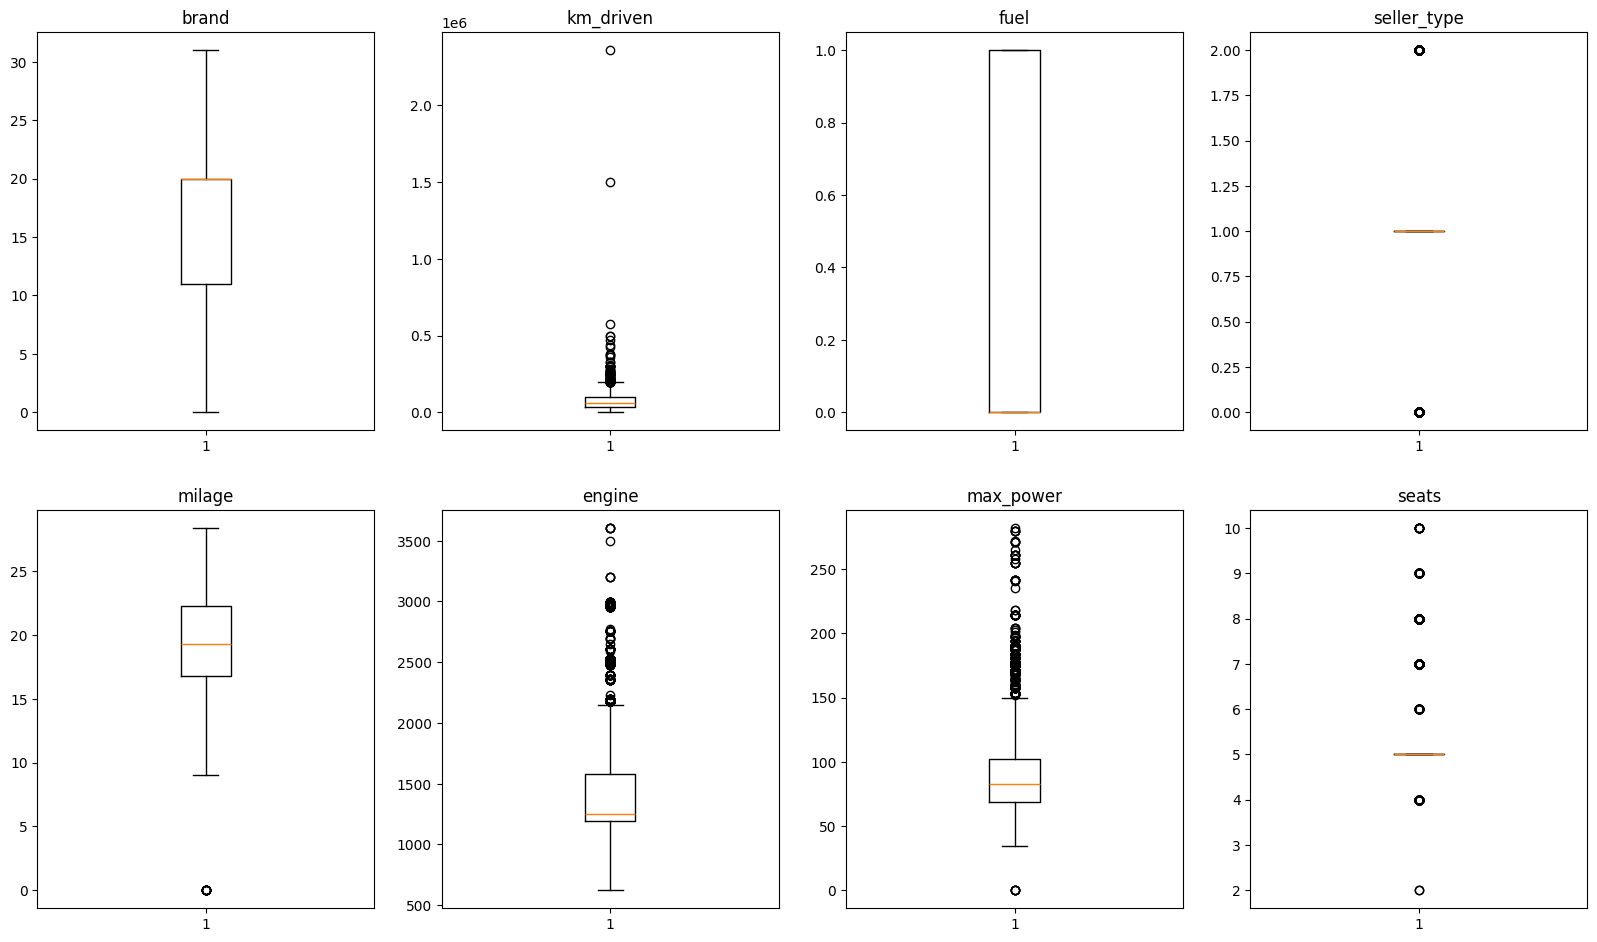

In [70]:
col_dict = {'brand':1,'km_driven':2, 'fuel':3, 'seller_type':4, 'milage':5, 'engine':6, 'max_power':7, 'seats':8}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(x_train[variable])
                     plt.title(variable)

plt.show()

In [71]:
def outlier_count(col, data = x_train):
    
    # calculating the 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate the inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # counting the number of outliers, which are the data that are less than min_val or more than max_val which was calculated above.
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculating the percentage of the outliers.
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [72]:
for col in x_train.columns: #lets check the percentage of outliers in each columns.
    outlier_count(col)


---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------seller_type---------------

Number of outliers: 944
Percent of data that is outlier: 16.8%

---------------milage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------seats---------------

Number of outliers: 1158
Percent of data that is outlier: 20.61%


In [73]:
from sklearn.preprocessing import StandardScaler

# feature scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [74]:
print("Shape of x_train: ", x_train.shape) #printing after scaling
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (5619, 8)
Shape of x_test:  (2409, 8)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [75]:
from sklearn.linear_model import LinearRegression  #calculating the MSE and r2 using the linear regression model
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  238980166156.95023
r2:  0.6423908700337255


In [76]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# importing the Libraries for model evaluation

# puting the models we will be using in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models we will be testing
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [77]:
y_train.isna().sum()

np.int64(0)

In [78]:
from sklearn.model_selection import KFold, cross_val_score # checking how the different algorithms perform.

#train and test lists for keeping mse
train_mse = []
test_mse = []

#defining the splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms): 
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}") 

Linear Regression - Score: [-2.59716868e+11 -2.18040698e+11 -2.37087353e+11 -3.12037967e+11
 -1.85270419e+11]; Mean: -242430661046.06378
SVR - Score: [-6.21821262e+11 -6.73638830e+11 -5.89284741e+11 -6.24644236e+11
 -8.43020821e+11]; Mean: -670481978244.7389
KNeighbors Regressor - Score: [-5.43915824e+10 -7.73004842e+10 -4.95521559e+10 -9.65378909e+10
 -7.10907327e+10]; Mean: -69774569216.3588
Decision-Tree Regressor - Score: [-5.54722032e+10 -9.59319060e+10 -3.82635942e+10 -5.49918465e+10
 -7.52003318e+10]; Mean: -63971976339.11658
Random-Forest Regressor - Score: [-2.82469314e+10 -4.13398246e+10 -3.64044760e+10 -3.14968700e+10
 -3.96938626e+10]; Mean: -35436392934.63193


In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1) # we used the random forest regressor because it has the most suitable output.

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# grid_search
grid.fit(x_train, y_train); 

In [80]:
from sklearn.metrics import mean_squared_error, r2_score # mean squared error and the r2 score

best_rf = grid.best_estimator_

yPred = best_rf.predict(x_test)

print("Best Parameter: ", grid.best_params_)
print("MSE: ", mean_squared_error(y_test, yPred))
print("R squared: ", r2_score(y_test, yPred))

Best Parameter:  {'bootstrap': True, 'max_depth': None, 'n_estimators': 12}
MSE:  56098054079.25847
R squared:  0.9160550574774081


In [81]:
grid.best_params_ #Testing the best grid parameter

{'bootstrap': True, 'max_depth': None, 'n_estimators': 12}

In [82]:
best_mse = grid.best_score_  

In [83]:
best_mse  

np.float64(-34545448931.36446)

In [84]:
yhat = grid.predict(x_test)
mean_squared_error(y_test, yhat)

56098054079.25847

In [85]:
#algorithm way 
rf = grid.best_estimator_

rf.feature_importances_

array([0.01466962, 0.1526914 , 0.00629567, 0.0050413 , 0.03440713,
       0.02140588, 0.76103942, 0.00444957])

<BarContainer object of 8 artists>

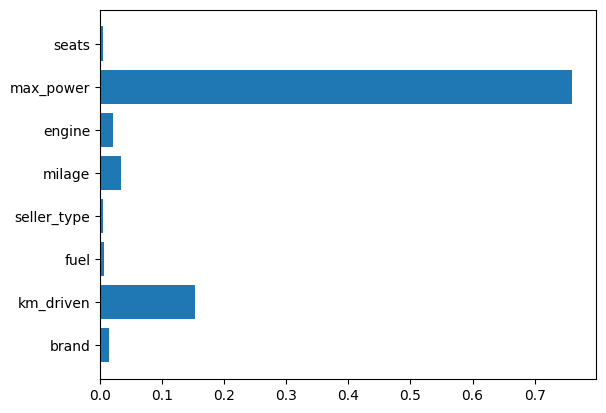

In [86]:
plt.barh(X.columns, rf.feature_importances_) #plotting a bar for important feature acc to rf

Text(0.5, 0, 'Random Forest Feature Importance')

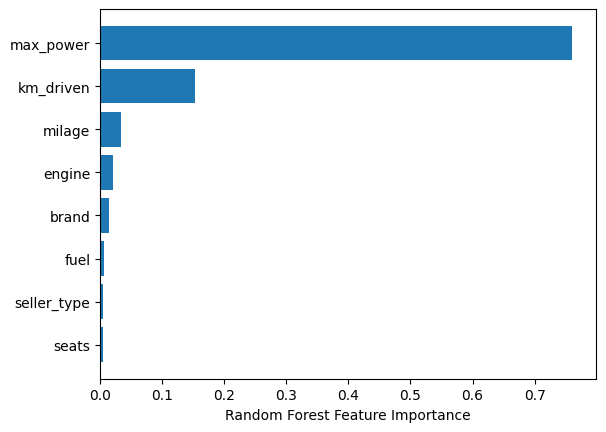

In [87]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance") #plotting a bar according to the important features determined by the random forest regressor.

Text(0.5, 0, 'Random Forest Feature Importance')

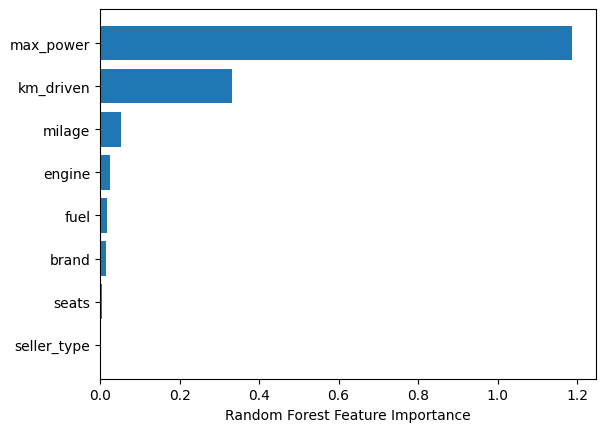

In [88]:
#permutation way
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, x_test, y_test)

#plotting
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [89]:
#inference
import pickle

# saving the model
filename = 'car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [90]:
loaded_model = pickle.load(open(filename, 'rb')) #load model

In [91]:
df[['brand', 'km_driven', 'fuel', 'seller_type', 'milage', 'engine', 'max_power', 'seats']].loc[1] # show the data of row with index 1

brand              27.00
km_driven      120000.00
fuel                0.00
seller_type         1.00
milage             21.14
engine           1498.00
max_power         103.52
seats               5.00
Name: 1, dtype: float64

In [92]:
sample = np.array([[27.00, 120000, 0.00, 1.00, 21.14, 1498.00, 103.52, 5.00]]) #input data tp check the price. the 27 is the brand name converted to numerical value. The later ones are in sequence to the output above. km driven, furl, seller type, milage, engine, max power and seats.

In [93]:
predicted_car_price = loaded_model.predict(sample)# predicting the car price according to the data inserted above.
predicted_car_price

array([2379583.33333333])

The features were selected based on an analysis of the correlation matrix, including maximum power, engine, mileage, and instinct about the relationship between car prices and other factors. I chose the features based on the correlation matrix and instinct about the relationship that car prices have with other factors. I took the engine(0.46) and max power(0.75) as they had a direct relationship, as displayed in the correlation matrix. Even though some features showed moderate or weak correlation, they were still taken as car prices are also affected by intangible factors.
I took brand as an important feature, reflecting on consumer perceptions of reliability, prestige, and long-term value retention. Features such as mileage, km driven, were taken as they logically help determine the value of the car and indicate the condition of the car, which determines the value. Prices also often fluctuate according to the seller. ie, when sold by an individual, it might cost less in comparison to a dealer or a trademark dealer, as dealers and trademark dealers have to account for the expenses of their own and profits. The number of seats or the size of the vehicle will affect their price.  A two-seater sports car costs more. A sports car might depreciate more. As car costs vary according to the fuel in the primary market, it also determines the cost of the vehicle in the secondary market.
Transmission was dropped as asked. Transmission showed a significant negative correlation. I did not take the owner feature as once the car prices enter the secondary market, the prices drop initially, ie, from the first owner to the second, then the number of owners doesn't affect the car price, the prices remain similar 2nd to nth number of owners. The feature year, even though it showed good correlation, was dropped as I did not want to take all the data with a good correlation value, and there are times when old cars cost more than new ones, i.e, vintage cars cost more than new ones. Especially in the secondary market, the car prices of the previous few years will be similar. The car values in the second-hand market are affected more by the factors that show its condition and operations.
I ran the tests using the linear regression model, MSE = 2.39 × 10¹¹, and R² = 0.642. This model explains the 64% variation in car prices, but there is still a 36% variation unexplained. This happened because the features taken also included non-linear feature interactions, as complex, nonlinear relationships exist in pricing patterns. It is also because of the outliers that exist in the data. It would have helped linear regression to perform better if more detailed data on the car condition, region existed. Results from the SVR model also suffered because of the large data set ( dimensionality) and scaling issues. The KNN fared much better than Linear & SVR as KNN predicts based on “nearby” cars. If two cars have similar mileage, engine, and brand, their prices are close. However KNN model is sensitive to feature scaling and can be noisy if the dataset is large with outliers, which we did and which we have. The decision tree did better, as it split features into ranges, and it also captures non-linearities better than linear SVR.
Random Forest Regressor performed the best. Random forest captures the complex patterns and handles the non-linear features. As we took non-linear features, this model performed well. It handled the outliers and the mix of categorical and numerical features. The R² value of 0.9195 indicates that the model explains 91.95% of the variance in the car prediction model. MSE: 53770505014.55546. This metric measures the average squared differences between predicted and actual values. A lower MSE indicates better model performance. In this case, the MSE is quite large because the target variable has large numerical values. i.e, the car price.
In the end, an analysis of the important features(x) for the model was done. It displayed that the most important features were:
The max power, which had a high correlation to the y (selling price), was in the correlation matrix.
Km driver, although it had low correlation with selling price (y), played a vital role.
Features such as mileage, engine, and brand had some impact, but not as much as max power and km driven.
Seats and seller type contributed minimally to the model’s prediction.
Summarizing the analysis, this shows that in the random forest regression model, the used car prices are influenced by features such as technical performance features such as maximum power, km driven, mileage, while categorical factors contributed minimally.